In [ ]:
from Utilities.io import DataLoader
from Utilities.painter import Visualizer
from Models.RRDBNet import RRDBNet# we use RRDB in this demo

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


### Load in the sample images

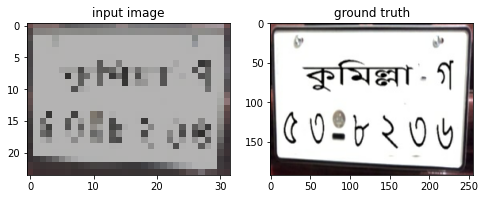

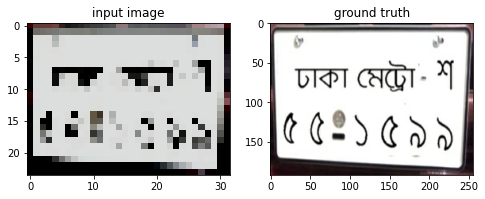

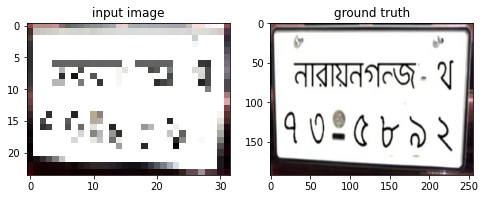

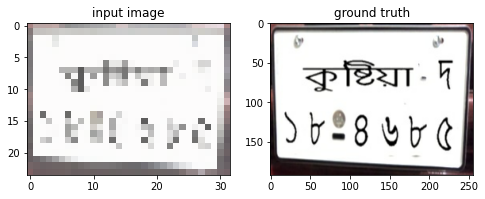

In [ ]:
import glob
#DATA_PATH = 'Samples'
DATA_PATH = '/gdrive/MyDrive/Dataset/VAL'
loader = DataLoader()
data = loader.load(glob.glob(DATA_PATH + '/*.jpg'), batchSize=1)
painter = Visualizer()
for downSample, original in data.take(4):
    painter.plot(downSample, original)

### Load in the pretrained super-resolution model

In [ ]:
# pretrained rrdb network can be found in the Pretrained folder
#MODEL_PATH = 'Pretrained/rrdb'
MODEL_PATH = '/gdrive/MyDrive/Dataset/RSGAN_M/rrdb'
model = RRDBNet(blockNum=10)
model.load_weights(MODEL_PATH)

### Run plate enhancement

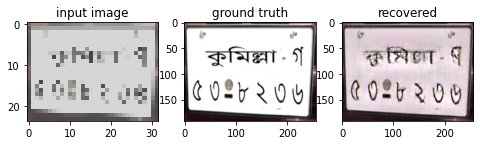

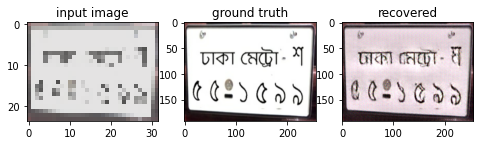

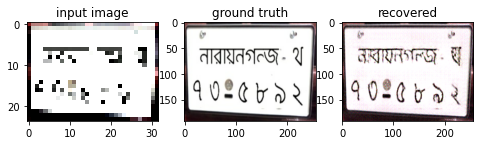

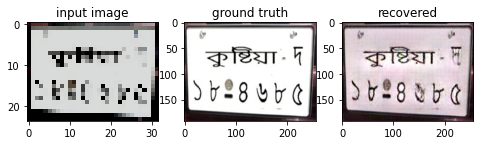

In [ ]:
for downSample, original in data.take(4):
    yPred = model.predict(downSample)
    painter.plot(downSample, original, yPred)